In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
print(df.shape)
df.head()

(253680, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
# Splitting the dataset into features and target variable
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [5]:
# Train/test split
train, test = train_test_split(df, test_size=0.2, random_state=21)
X_train, y_train = train.drop(columns = ['Diabetes_binary']), train['Diabetes_binary']
X_test, y_test = test.drop(columns = ['Diabetes_binary']), test['Diabetes_binary']
assert X_train.shape[0] == len(y_train)

In [6]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Fit random forest
model = RandomForestClassifier(n_estimators = 200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [19]:
# Define the model with adjusted parameters
from sklearn.model_selection import cross_val_score
# Increasing the number of estimators and setting a max depth
adjusted = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Performing 5-fold cross-validation
cv_scores = cross_val_score(adjusted, X_train_scaled, y_train, cv=5)

cv_scores.mean(), cv_scores.std()

(0.8657462137736427, 0.0002441619821007604)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

pred_scores = model.predict_proba(X = X_test)[:, 1] # predicted probability of diabetes
pred_labels = model.predict(X = X_test) # predicted label of diabetes

acc_score = accuracy_score(y_true = y_test, y_pred = pred_labels)
pre_score = precision_score(y_true = y_test, y_pred = pred_labels)
rec_score = recall_score(y_true = y_test, y_pred = pred_labels)
report = classification_report(y_true = y_test, y_pred = pred_labels)
f1 = f1_score(y_true = y_test, y_pred = pred_labels)

print(f"accuracy: {acc_score}")
print(f"precision: {pre_score}")
print(f"recall: {rec_score}")
print(f"f1: {f1}")
print(f"report: {report}")

accuracy: 0.8590547146010722
precision: 0.490234375
recall: 0.176735671032249
f1: 0.2598074733464445
report:               precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43635
         1.0       0.49      0.18      0.26      7101

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736



## Report and Analysis
According to the report we can see that non-diabetic patients have a higher precision rate (88%) and a higher recall rate (97%). Diabetes has lower precision (48%) and lower recall (17%). Overall, the model's predictive performance for non-diabetics is better than diabetes.

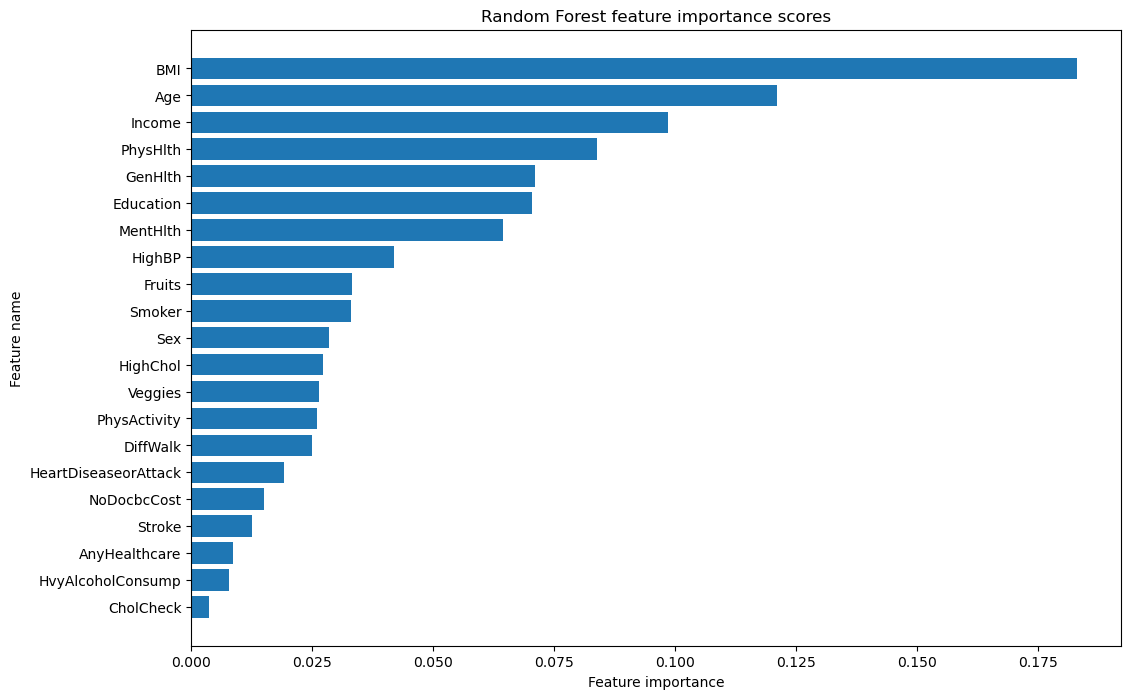

In [15]:
# Random Forest feature importance scores
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Create a DataFrame to hold feature names and their importance scores
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances = importances.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(importances['Feature'], importances['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature importance')
plt.ylabel('Feature name')
plt.title('Random Forest feature importance scores')
plt.show()

In [16]:
# Rounding the importance scores to four decimal places
importances_rounded = importances.copy()
importances_rounded['Importance'] = importances_rounded['Importance'].round(4)
importances_rounded

,Feature,Importance
BMI,BMI,0.1831
Age,Age,0.1211
Income,Income,0.0985
PhysHlth,PhysHlth,0.0838
GenHlth,GenHlth,0.0709
Education,Education,0.0704
MentHlth,MentHlth,0.0644
HighBP,HighBP,0.0418
Fruits,Fruits,0.0333
Smoker,Smoker,0.0331


## Report and Analysis
Through the above plotting, we can see that the feature importance scores show the most important features for predicting diabetes in the random forest model. Based on importance scores, the five most important features are:
BMI, Age, Income, PhysHlth, Education